In [37]:
import logging

import networkx as nx
from matplotlib import pyplot as plt

from broadcastStorm import Message, Node, Network

from util import sutup_logger, mean

In [39]:
logger = sutup_logger()

### First task
1) розробити модель розповсюдження інформаціїї за схемою "broadcast", продемонструвати ефект "broadcast storm";

Lets create random graph with 4 nodes

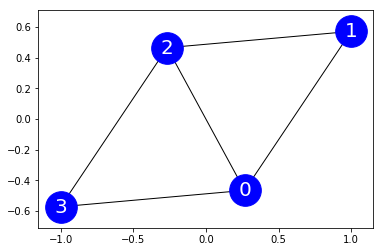

In [40]:
g = nx.gnp_random_graph(4,0.5)
pos = nx.spring_layout(g)
#nx.draw(g)

nx.draw_networkx_nodes(g, pos, node_color='b', node_size=1000)
nx.draw_networkx_labels(g, pos, font_color='w', font_size=20)
nx.draw_networkx_edges(g, pos)

plt.show()

Create a network with this graph

The Network class is already implemented with utility data structures that allow to avoid broadcast storm

To be able to simulate broadcast storm we need to disable them by specifying ```keep_history=0```

In [41]:
network = Network(g, logger, keep_history=0)

Lets send 2 messages using broadcast method of transferring

    from node 0 to node 2 and 
    
    from node 2 to node 3 

In [43]:
msg1 = Message(0, ttl=1000, sender_id=0, dest_node_id=2)
msg2 = Message(1, ttl=1000, sender_id=2, dest_node_id=3)

network.add_message(msg1)
network.add_message(msg2)

Set logging to error because there will be lots of info messages when simulation broadcast storm

In [45]:
network.logger.setLevel(logging.ERROR)

Since we are going to simulate broadcast storm, we need to be able to stop the program at some point.
Suppose that network shuts down when number of messages in the network exceeds ```MAX_MESSAGES```

In [46]:
MAX_MESSAGES = 200

In [47]:
n_msgs = 2 # 2 since we are sending 2 messages

# lets store history of messages in the network
n_msgs_history = [n_msgs]

n_steps = 0
# while there are messages in the network, and network is operating
while n_msgs < MAX_MESSAGES and n_msgs > 0:
    n_msgs = network.simulate_one_step()
    
    n_msgs_history.append(n_msgs)
    
    n_steps += 1
    print("Number of messages in the system after {} steps is {}".format(n_steps, n_msgs))

Number of messages in the system after 1 steps is 8
Number of messages in the system after 2 steps is 24
Number of messages in the system after 3 steps is 84
Number of messages in the system after 4 steps is 320


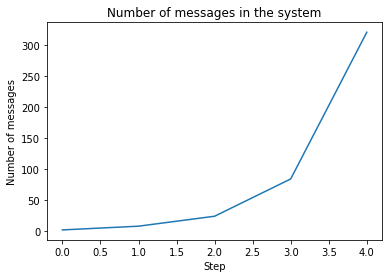

In [48]:
plt.plot(n_msgs_history)
plt.title("Number of messages in the system")
plt.xlabel("Step")
plt.ylabel("Number of messages")
plt.show()

We can see the effect of broadcast storm on the graph